In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pystan
import seaborn as sns
import pandas as pd

/anaconda3/envs/elfi/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/elfi/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data_source = 1

In [10]:
# Function to plot posterior for two parameters

def plot_2D_marginal_distributions(param1, param2, f, param_name1='parameter1',param_name2='parameter2',file_name='file_name',data_source=data_source):
  #"""Plot posterior for 2 parameters, and print statistics."""
  
  # Summary statistics
  mean1 = np.mean(param1)
  median1 = np.median(param1)
  cred_min1, cred_max1 = np.percentile(param1, 2.5), np.percentile(param1, 97.5)
  cred_min501, cred_max501 = np.percentile(param1, 25), np.percentile(param1, 75)
  print('Mean of '+param_name1+' = '+str(mean1))
  print('Median of '+param_name1+' = '+str(median1))
  print('95% CI of '+param_name1+' = ['+str(cred_min1)+', '+str(cred_max1)+']')
  print('50% CI of '+param_name1+' = ['+str(cred_min501)+', '+str(cred_max501)+']')
    
  mean2 = np.mean(param2)
  median2 = np.median(param2)
  cred_min2, cred_max2 = np.percentile(param2, 2.5), np.percentile(param2, 97.5)
  cred_min502, cred_max502 = np.percentile(param2, 25), np.percentile(param2, 75)
  print('Mean of '+param_name2+' = '+str(mean2))
  print('Median of '+param_name2+' = '+str(median2))
  print('95% CI of '+param_name2+' = ['+str(cred_min2)+', '+str(cred_max2)+']')
  print('50% CI of '+param_name2+' = ['+str(cred_min502)+', '+str(cred_max502)+']')

  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20, 15),sharex='col')
  
  f1 = ax1.hist(param1, 30, density=True) #sns.kdeplot(param1, shade=True)
  ax1.set_xlabel(r'$\mathcal{R}_0$',fontsize=20)
  #ax1.set_ylabel('density',fontsize=20)
  ax1.axvline(mean1, color='r', lw=2, linestyle='--',label='mean')
  ax1.axvline(median1, color='c', lw=2, linestyle='--',label='median')
  ax1.axvline(cred_min501, linestyle=':', color='m', alpha=0.9, label='50% CI')
  ax1.axvline(cred_max501, linestyle=':', color='m', alpha=0.9)
  ax1.axvline(cred_min1, linestyle=':', color='k', alpha=0.9, label='95% CI')
  ax1.axvline(cred_max1, linestyle=':', color='k', alpha=0.9)
  ax1.legend(fontsize=20)  

  f2 = ax4.hist(param2, 30, density=True) #sns.kdeplot(param2, shade=True)
  ax4.set_xlabel(r'$\sigma$',fontsize=20)
  #ax4.set_ylabel('density',fontsize=20)
  ax4.axvline(mean2, color='r', lw=2, linestyle='--',label='mean')
  ax4.axvline(median2, color='c', lw=2, linestyle='--',label='median')
  ax4.axvline(cred_min502, linestyle=':', color='m', alpha=0.9, label='50% CI')
  ax4.axvline(cred_max502, linestyle=':', color='m', alpha=0.9)
  ax4.axvline(cred_min2, linestyle=':', color='k', alpha=0.9, label='95% CI')
  ax4.axvline(cred_max2, linestyle=':', color='k', alpha=0.9)
  ax4.legend(fontsize=20) 
  xmin, xmax = 0, 5
  ymin, ymax = 0.5, 1

  # Peform the kernel density estimate
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

  # Contourf plot
  cfset = ax2.contourf(yy, xx, f, 20,cmap='Blues')
  # Contour plot
  cset = ax2.contour(yy, xx, f,colors='k')
  if data_source == 0:
      ax2.scatter(1,2,color = 'red',s=400,label='true value')

  # Label plot
  ax2.clabel(cset, inline=1, fontsize=20)
  ax2.set_ylabel(r'$\mathcal{R}_0$',fontsize=20)
  ax2.set_xlabel(r'$\sigma$',fontsize=20)
  ax2.set_xlim(ymin,ymax)
  ax2.set_ylim(xmin,xmax)
  ax2.legend(fontsize=20) 
  #fig.colorbar(cfset,ax=ax2,shrink=1)

  cfset = ax3.contourf(xx, yy, f, 20,cmap='Blues')
  # Contour plot
  cset = ax3.contour(xx, yy, f,colors='k')
  if data_source == 0:
      ax3.scatter(2,1,color = 'red',s=400,label='true value')
  # Label plot
  ax3.clabel(cset, inline=1, fontsize=20)
  ax3.set_xlabel(r'$\mathcal{R}_0$',fontsize=20)
  ax3.set_ylabel(r'$\sigma$',fontsize=20)
  ax3.set_ylim(ymin,ymax)
  ax3.set_xlim(xmin,xmax)
  ax3.legend(fontsize=20) 
  #ax1.label_outer()
  ax2.label_outer()
  ax3.label_outer()
  #ax4.label_outer()
  #fig.colorbar(cfset,ax=ax3,shrink=1)
  
  for ax in [ax1, ax2, ax3, ax4]:
      for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
          item.set_fontsize(25)
  
    
  plt.gcf().tight_layout()

  ind = np.unravel_index(np.argmax(f, axis=None), f.shape)

  print('Mode of ('+param_name1+', '+param_name2+') = ('+str(xx[ind])+', '+str(yy[ind])+')')

  plt.savefig(file_name)

In [5]:
# Function to plot posterior for three parameters

def plot_3D_marginal_distributions(param1, param2, param3, DImax, f12, f23, f13, file_name='file_name',data_source=data_source):
  #"""Plot the posterior for 3 parameters, and print statistics."""
  
  param_name1='R_0'
  param_name2='\sigma'
  param_name3='1/ \theta'   
    
  # Summary statistics
  mean1 = np.mean(param1)
  median1 = np.median(param1)
  cred_min1, cred_max1 = np.percentile(param1, 2.5), np.percentile(param1, 97.5)
  cred_min501, cred_max501 = np.percentile(param1, 25), np.percentile(param1, 75)
  print('Mean of '+param_name1+' = '+str(mean1))
  print('Median of '+param_name1+' = '+str(median1))
  print('95% CI of '+param_name1+' = ['+str(cred_min1)+', '+str(cred_max1)+']')
  print('50% CI of '+param_name1+' = ['+str(cred_min501)+', '+str(cred_max501)+']')
    
  mean2 = np.mean(param2)
  median2 = np.median(param2)
  cred_min2, cred_max2 = np.percentile(param2, 2.5), np.percentile(param2, 97.5)
  cred_min502, cred_max502 = np.percentile(param2, 25), np.percentile(param2, 75)
  print('Mean of '+param_name2+' = '+str(mean2))
  print('Median of '+param_name2+' = '+str(median2))
  print('95% CI of '+param_name2+' = ['+str(cred_min2)+', '+str(cred_max2)+']')
  print('50% CI of '+param_name2+' = ['+str(cred_min502)+', '+str(cred_max502)+']')
    
  mean3 = np.mean(param3)
  median3 = np.median(param3)
  cred_min3, cred_max3 = np.percentile(param3, 2.5), np.percentile(param3, 97.5)
  cred_min503, cred_max503 = np.percentile(param3, 25), np.percentile(param3, 75)
  print('Mean of '+param_name3+' = '+str(mean3))
  print('Median of '+param_name3+' = '+str(median3))
  print('95% CI of '+param_name3+' = ['+str(cred_min3)+', '+str(cred_max3)+']')
  print('50% CI of '+param_name3+' = ['+str(cred_min503)+', '+str(cred_max503)+']')

  fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,figsize=(30, 20),sharex='col')
  
  f1 = ax1.hist(param1, 30, density=True) #sns.kdeplot(param1, shade=True)
  ax1.set_xlabel(r'$\mathcal{R}_0$',fontsize=20)
  ax1.axvline(mean1, color='r', lw=2, linestyle='--',label='mean')
  ax1.axvline(median1, color='c', lw=2, linestyle='--',label='median')
  ax1.axvline(cred_min501, linestyle=':', color='m', alpha=0.9, label='50% CI')
  ax1.axvline(cred_max501, linestyle=':', color='m', alpha=0.9)
  ax1.axvline(cred_min1, linestyle=':', color='k', alpha=0.9, label='95% CI')
  ax1.axvline(cred_max1, linestyle=':', color='k', alpha=0.9)
  ax1.legend(fontsize=20)  

  f2 = ax5.hist(param2, 30, density=True) #sns.kdeplot(param2, shade=True)
  ax5.set_xlabel(r'$\sigma$',fontsize=20)
  ax5.axvline(mean2, color='r', lw=2, linestyle='--',label='mean')
  ax5.axvline(median2, color='c', lw=2, linestyle='--',label='median')
  ax5.axvline(cred_min502, linestyle=':', color='m', alpha=0.9, label='50% CI')
  ax5.axvline(cred_max502, linestyle=':', color='m', alpha=0.9)
  ax5.axvline(cred_min2, linestyle=':', color='k', alpha=0.9, label='95% CI')
  ax5.axvline(cred_max2, linestyle=':', color='k', alpha=0.9)
  ax5.legend(fontsize=20) 
    
  f3 = ax9.hist(param3, 30, density=True) #sns.kdeplot(param2, shade=True)
  ax9.set_xlabel(r'$1\theta$',fontsize=20)
  ax9.axvline(mean3, color='r', lw=2, linestyle='--',label='mean')
  ax9.axvline(median3, color='c', lw=2, linestyle='--',label='median')
  ax9.axvline(cred_min503, linestyle=':', color='m', alpha=0.9, label='50% CI')
  ax9.axvline(cred_max503, linestyle=':', color='m', alpha=0.9)
  ax9.axvline(cred_min3, linestyle=':', color='k', alpha=0.9, label='95% CI')
  ax9.axvline(cred_max3, linestyle=':', color='k', alpha=0.9)
  ax9.legend(fontsize=20) 
    
  #### 12
  # Peform the kernel density estimate
  xmin, xmax = 0, 5
  ymin, ymax = 0.5, 1
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

  # Contourf plot
  cfset = ax2.contourf(yy, xx, f12, 20,cmap='Blues')
  cset = ax2.contour(yy, xx, f12,colors='k')
  if data_source == 0:
      ax2.scatter(1,2,color = 'red',s=400,label='true value')
  ax2.clabel(cset, inline=1, fontsize=20)
  ax2.set_ylabel(r'$\mathcal{R}_0$',fontsize=20)
  ax2.set_xlabel(r'$\sigma$',fontsize=20)
  ax2.set_xlim(ymin,ymax)
  ax2.set_ylim(xmin,xmax)
  ax2.legend(fontsize=20) 

  cfset = ax4.contourf(xx, yy, f12, 20,cmap='Blues')
  cset = ax4.contour(xx, yy, f12,colors='k')
  if data_source == 0:
      ax4.scatter(2,1,color = 'red',s=400,label='true value')
  # Label plot
  ax4.clabel(cset, inline=1, fontsize=20)
  ax4.set_xlabel(r'$\mathcal{R}_0$',fontsize=20)
  ax4.set_ylabel(r'$\sigma$',fontsize=20)
  ax4.set_ylim(ymin,ymax)
  ax4.set_xlim(xmin,xmax)
  ax4.legend(fontsize=20) 

  ind = np.unravel_index(np.argmax(f12, axis=None), f12.shape)
  print('Mode of ('+param_name1+', '+param_name2+') = ('+str(xx[ind])+', '+str(yy[ind])+')')
 
  #### 23
    # Peform the kernel density estimate
  if DImax == 15:
      xmin, xmax = 5, 15
      realvalue = 10
  else:
      xmin, xmax = 15, 25
      realvalue = 20

  ymin, ymax = 0.5, 1
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

  # Contourf plot
  cfset = ax8.contourf(yy, xx, f23, 20,cmap='Blues')
  cset = ax8.contour(yy, xx, f23,colors='k')
  if data_source == 0:
      ax8.scatter(1,realvalue,color = 'red',s=400,label='true value')
  ax8.clabel(cset, inline=1, fontsize=20)
  ax8.set_ylabel(r'$1/\theta$',fontsize=20)
  ax8.set_xlabel(r'$\sigma$',fontsize=20)
  ax8.set_xlim(ymin,ymax)
  ax8.set_ylim(xmin,xmax)
  ax8.legend(fontsize=20) 

  cfset = ax6.contourf(xx, yy, f23, 20,cmap='Blues')
  cset = ax6.contour(xx, yy, f23,colors='k')
  if data_source == 0:
      ax6.scatter(realvalue,1,color = 'red',s=400,label='true value')
  # Label plot
  ax6.clabel(cset, inline=1, fontsize=20)
  ax6.set_xlabel(r'$1/\theta$',fontsize=20)
  ax6.set_ylabel(r'$\sigma$',fontsize=20)
  ax6.set_ylim(ymin,ymax)
  ax6.set_xlim(xmin,xmax)
  ax6.legend(fontsize=20) 

  ind = np.unravel_index(np.argmax(f23, axis=None), f23.shape)
  print('Mode of ('+param_name3+', '+param_name2+') = ('+str(xx[ind])+', '+str(yy[ind])+')')

  ### 13
  # Peform the kernel density estimate
  xmin, xmax = 0, 5
  if DImax == 15:
      ymin, ymax = 5, 15
  else:
      ymin, ymax = 15, 25

  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

  # Contourf plot
  cfset = ax3.contourf(yy, xx, f13, 20,cmap='Blues')
  cset = ax3.contour(yy, xx, f13,colors='k')
  if data_source == 0:
      ax3.scatter(realvalue,2,color = 'red',s=400,label='true value')
  ax3.clabel(cset, inline=1, fontsize=20)
  ax3.set_ylabel(r'$\mathcal{R}_0$',fontsize=20)
  ax3.set_xlabel(r'$1/\theta$',fontsize=20)
  ax3.set_xlim(ymin,ymax)
  ax3.set_ylim(xmin,xmax)
  ax3.legend(fontsize=20) 

  cfset = ax7.contourf(xx, yy, f13, 20,cmap='Blues')
  cset = ax7.contour(xx, yy, f13,colors='k')
  if data_source == 0:
      ax7.scatter(2,realvalue,color = 'red',s=400,label='true value')
  # Label plot
  ax7.clabel(cset, inline=1, fontsize=20)
  ax7.set_xlabel(r'$\mathcal{R}_0$',fontsize=20)
  ax7.set_ylabel(r'$1/\theta$',fontsize=20)
  ax7.set_ylim(ymin,ymax)
  ax7.set_xlim(xmin,xmax)
  ax7.legend(fontsize=20) 

  ind = np.unravel_index(np.argmax(f13, axis=None), f13.shape)
  print('Mode of ('+param_name1+', '+param_name3+') = ('+str(xx[ind])+', '+str(yy[ind])+')')
  
  for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 , ax9]:
      for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
          item.set_fontsize(25) 
  
  plt.gcf().tight_layout()
  plt.savefig(file_name)

## Figure S5: posterior distributions, real data, $1/\theta\in[15, 25]$ years

In [12]:
saved_model_name='SAMPLES_DI15_25_100000.npz'
saved_data=np.load(saved_model_name) # load saved data

In [13]:
param1=saved_data['p_1']
param2=saved_data['p_3']
xmin, xmax = 0, 5
ymin, ymax = 0.5, 1

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([param1, param2])
kernel = sc.stats.gaussian_kde(values)
fs = np.reshape(kernel(positions).T, xx.shape)

Marginal and joint-marginal posterior distributions, with statistics
Mean of R_0 = 2.1917715383126537
Median of R_0 = 2.118672989143811
95% CI of R_0 = [0.13674287839775817, 4.647140793425746]
50% CI of R_0 = [1.1511905041189814, 3.153487665346508]
Mean of \sigma = 0.782527571818481
Median of \sigma = 0.7976577507103229
95% CI of \sigma = [0.5192156442709895, 0.9909156713436162]
50% CI of \sigma = [0.6679239592074568, 0.9058893306297824]


Mode of (R_0, \sigma) = (1.9696969696969697, 0.9343434343434344)


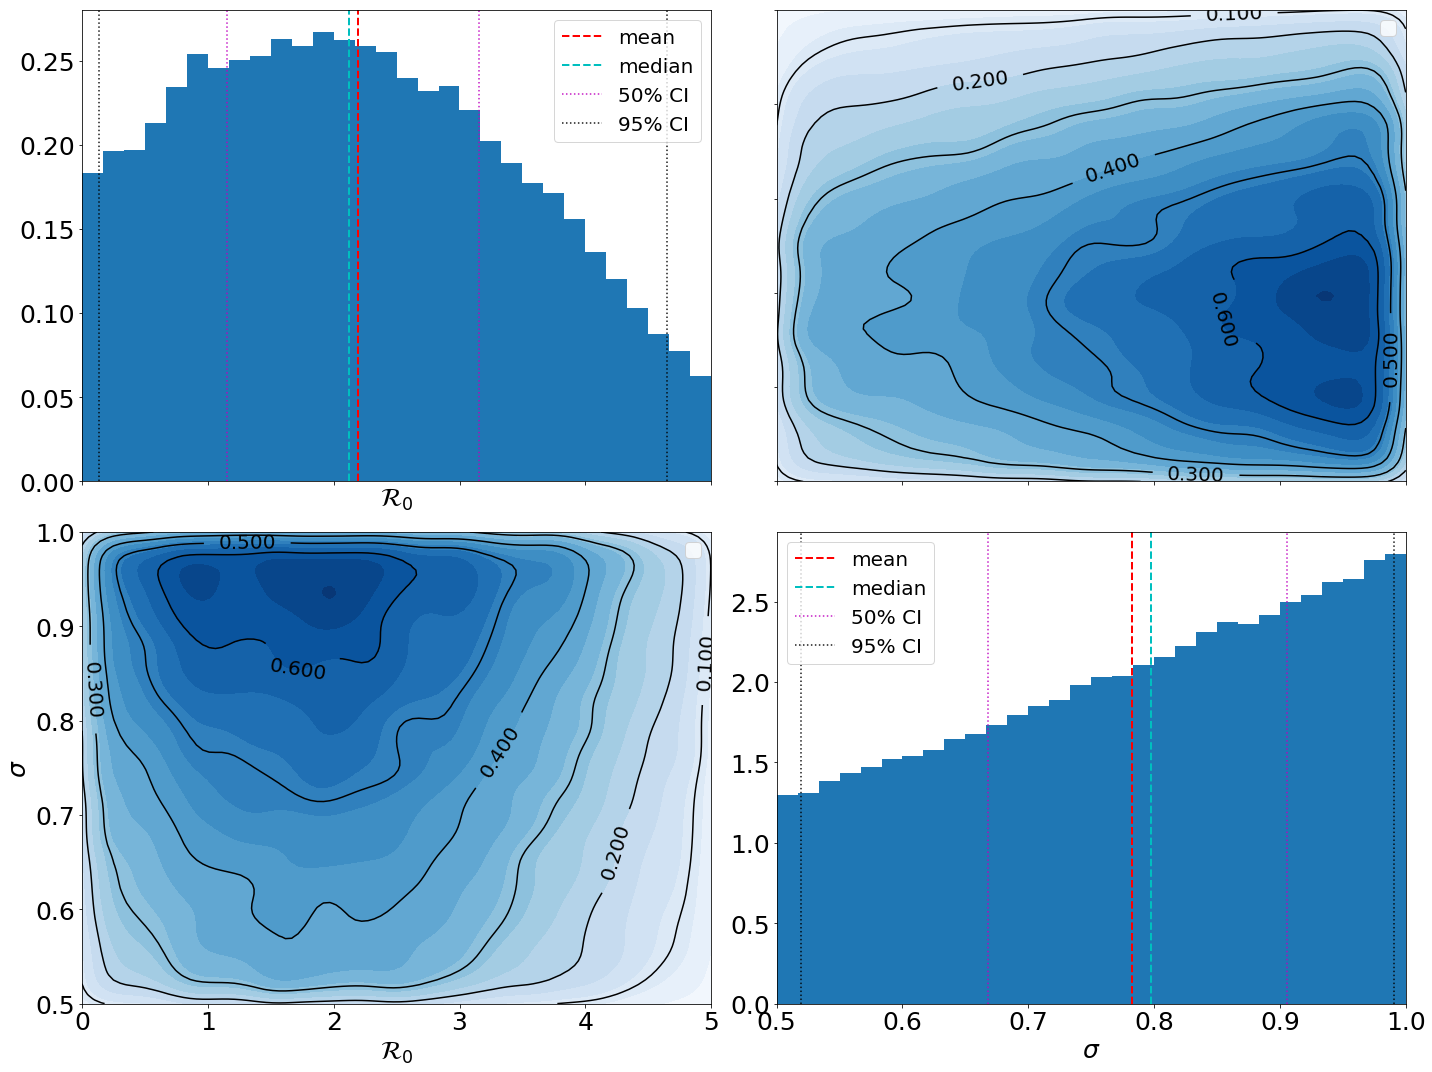

In [14]:
print('Marginal and joint-marginal posterior distributions, with statistics')
plot_2D_marginal_distributions(saved_data['p_1'], saved_data['p_3'], fs, param_name1='R_0', param_name2='\sigma',file_name='figure_S5.eps',data_source=1)

## Figure 4, posterior distributions, real data, $1/\theta\in[5,15]$ years

In [5]:
saved_model_name='SAMPLES_DI5_15_100000.npz'
saved_data=np.load(saved_model_name) # load saved data

In [6]:
param1=saved_data['p_1']
param2=saved_data['p_3']
xmin, xmax = 0, 5
ymin, ymax = 0.5, 1

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([param1, param2])
kernel = sc.stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Marginal and joint-marginal posterior distributions, with statistics
Mean of R_0 = 2.2727440173109383
Median of R_0 = 2.2231632049768226
95% CI of R_0 = [0.17827291470978673, 4.65970048417246]
50% CI of R_0 = [1.2734767570751222, 3.223887083373876]
Mean of \sigma = 0.7780924771111933
Median of \sigma = 0.7912462204633681
95% CI of \sigma = [0.5182371664642131, 0.9907221350728552]
50% CI of \sigma = [0.6622245118122747, 0.9014215032466527]


Mode of (R_0, \sigma) = (2.1717171717171717, 0.9545454545454546)


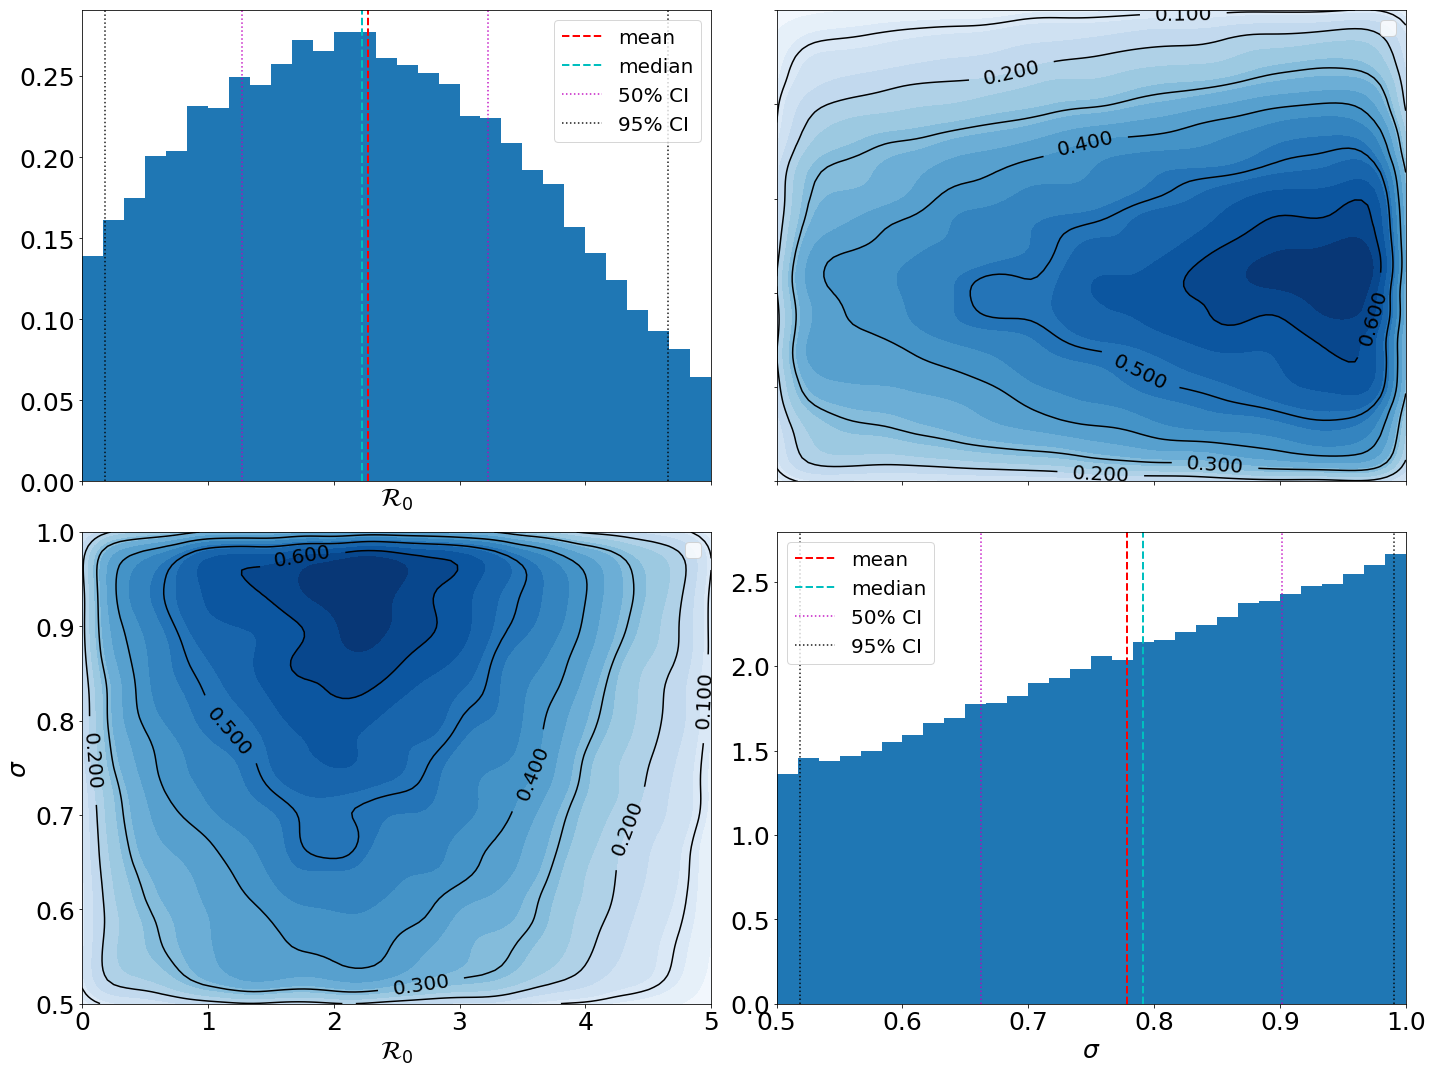

In [11]:
print('Marginal and joint-marginal posterior distributions, with statistics')
plot_2D_marginal_distributions(saved_data['p_1'], saved_data['p_3'], f, param_name1='R_0', param_name2='\sigma',file_name='figure_4.eps',data_source=1)

## Figure S7: posterior distributions, synthetic data, $1/\theta = 20$ years

In [6]:
save_model_name3='SAMPLES_syn_DI15_25_100000.npz'
saved_data2=np.load(save_model_name3) # load saved data

In [7]:
param1=saved_data2['p_1']
param2=saved_data2['p_3']
param3=saved_data2['p_2']
xmin, xmax = 0, 5
ymin, ymax = 0.5, 1

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([param1, param2])
kernel = sc.stats.gaussian_kde(values)
f12b = np.reshape(kernel(positions).T, xx.shape)

xmin2, xmax2 = 0, 5
ymin2, ymax2 = 15, 25

# Peform the kernel density estimate
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
positions = np.vstack([xx2.ravel(), yy2.ravel()])
values = np.vstack([param1, param3])
kernel = sc.stats.gaussian_kde(values)
f13b = np.reshape(kernel(positions).T, xx2.shape)

xmin3, xmax3 = 15, 25
ymin3, ymax3 = 0.5, 1

# Peform the kernel density estimate
xx3, yy3 = np.mgrid[xmin3:xmax3:100j, ymin3:ymax3:100j]
positions = np.vstack([xx3.ravel(), yy3.ravel()])
values = np.vstack([param3, param2])
kernel = sc.stats.gaussian_kde(values)
f23b = np.reshape(kernel(positions).T, xx3.shape)


Marginal and joint-marginal posterior distributions, with statistics
Mean of R_0 = 2.0751992527968133
Median of R_0 = 1.8267018137131565
95% CI of R_0 = [1.4087349662677047, 3.7328476729421003]
50% CI of R_0 = [1.6799220939534032, 2.392529984080556]
Mean of \sigma = 0.8528121695831637
Median of \sigma = 0.8827135053729331
95% CI of \sigma = [0.5619395597843736, 0.9951854814487672]
50% CI of \sigma = [0.7842308343677852, 0.9482576721040842]
Mean of 1/ 	heta = 19.604096247119518
Median of 1/ 	heta = 19.418520263084083
95% CI of 1/ 	heta = [15.242387106582202, 24.699978563959732]
50% CI of 1/ 	heta = [17.184723232737745, 21.864883002631686]
Mode of (R_0, \sigma) = (1.7171717171717171, 0.9696969696969697)
Mode of (1/ 	heta, \sigma) = (16.313131313131315, 0.9696969696969697)
Mode of (R_0, 1/ 	heta) = (1.7171717171717171, 16.11111111111111)


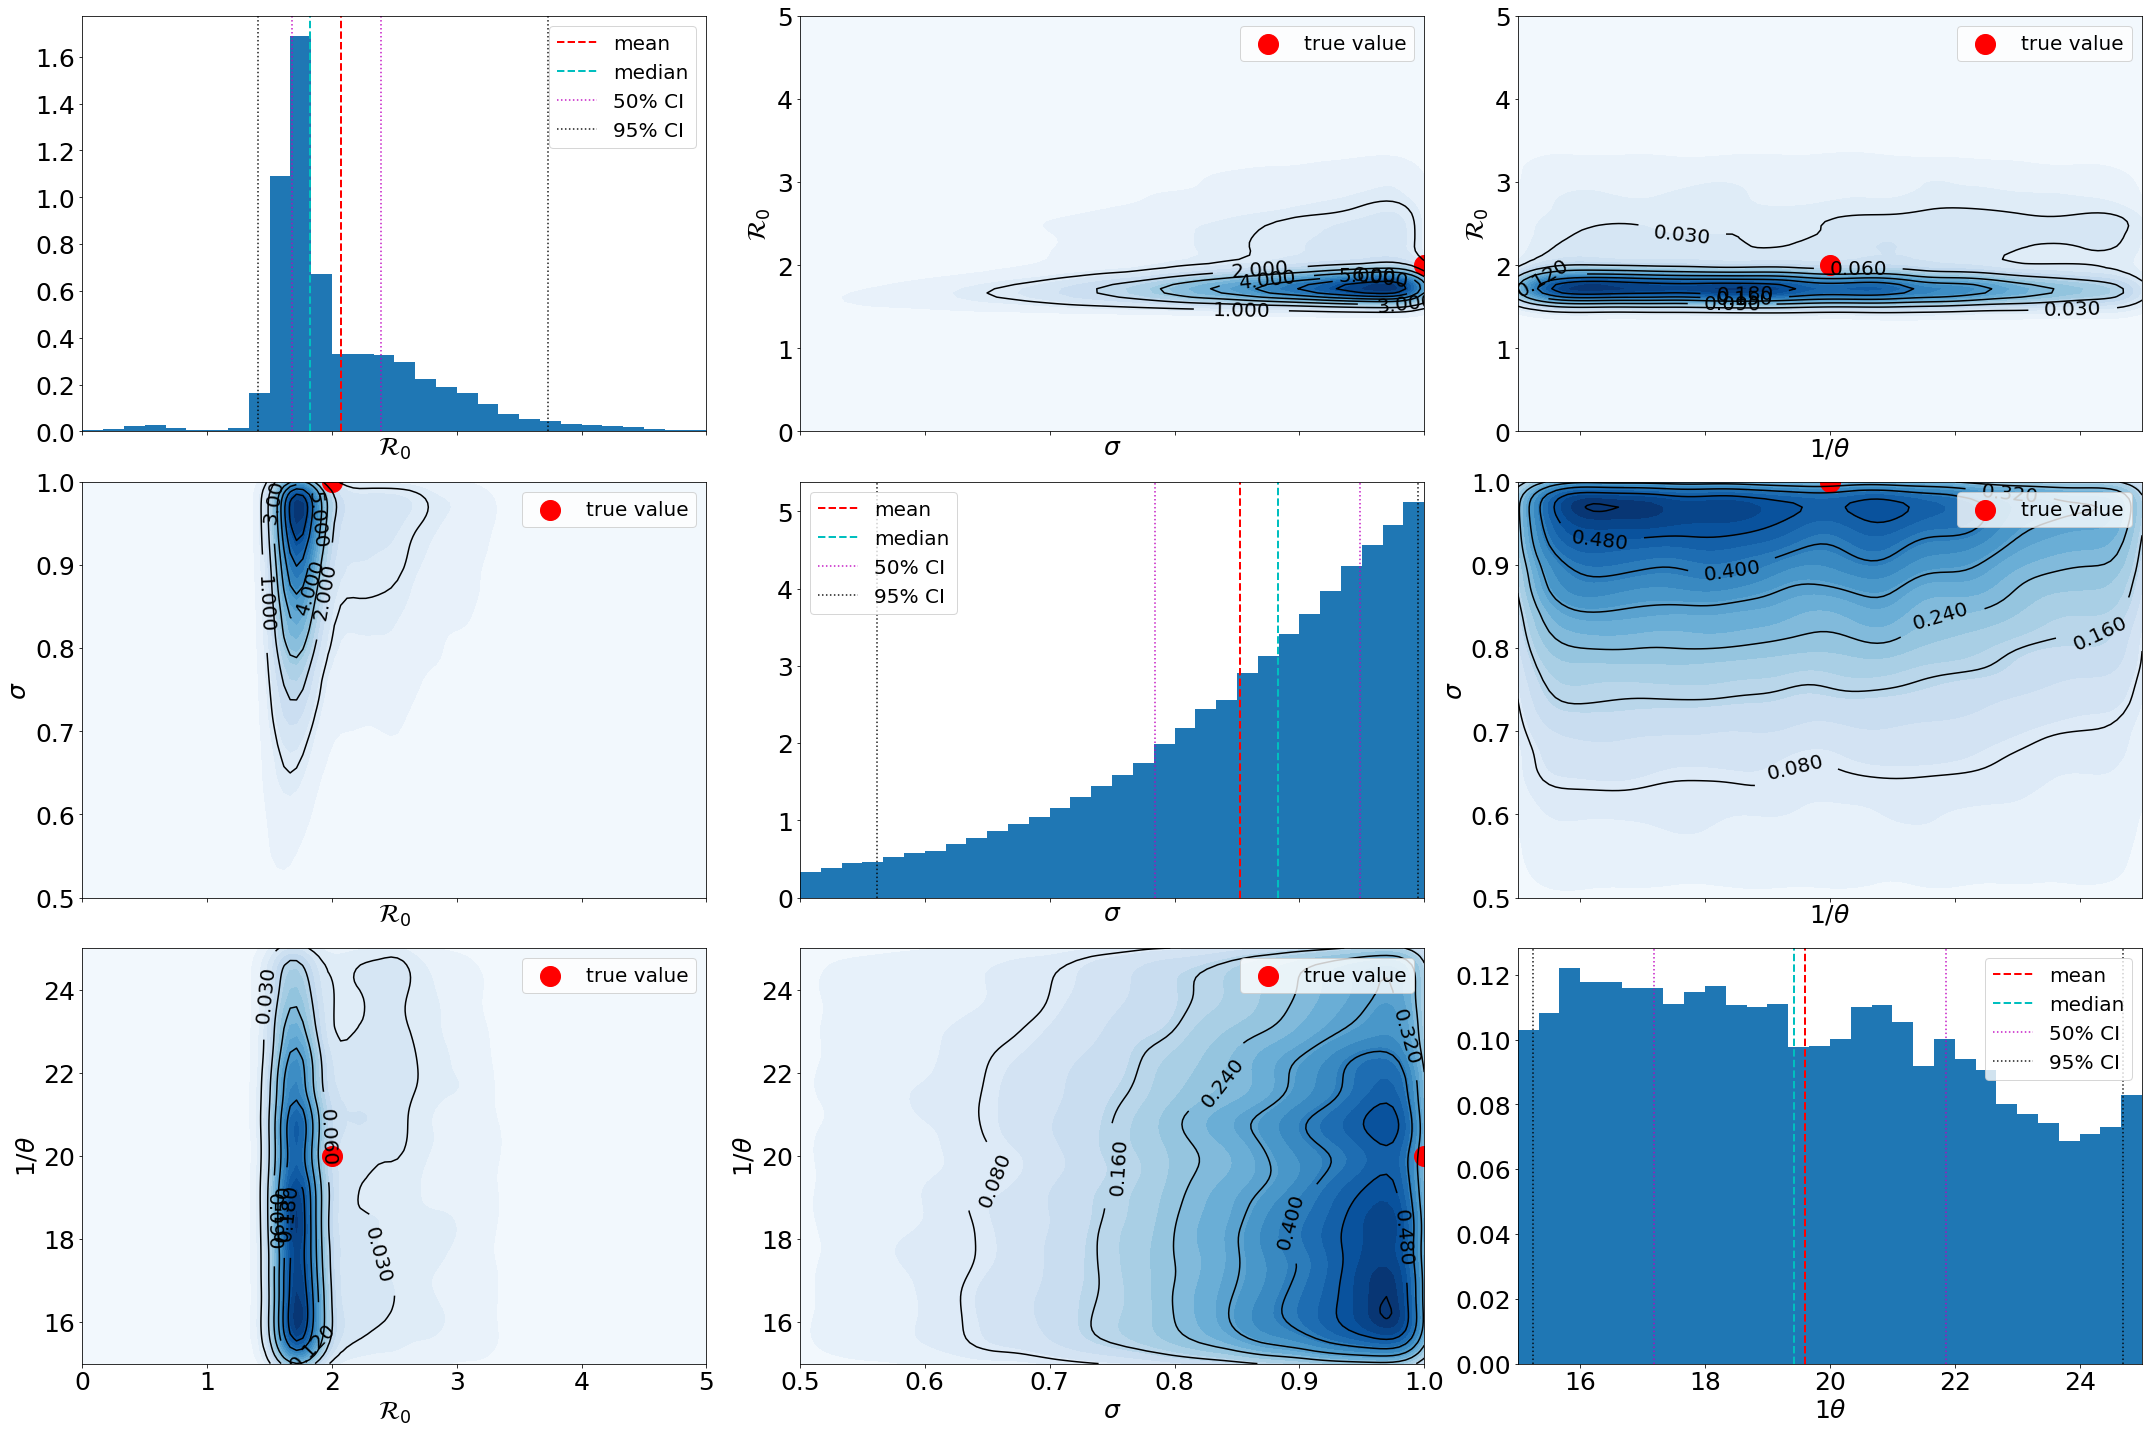

In [8]:
print('Marginal and joint-marginal posterior distributions, with statistics')
plot_3D_marginal_distributions(param1, param2, param3, 25, f12b, f23b, f13b, file_name='figure_S7.eps',data_source=0)

## Figure S6: posterior distributions, synthetic data, $1/\theta= 15$ years

In [18]:
save_model_name3='SAMPLES_syn_DI5_15_100000.npz'
saved_data2=np.load(save_model_name3) # load saved data

In [19]:
param1=saved_data2['p_1']
param2=saved_data2['p_3']
param3=saved_data2['p_2']
xmin, xmax = 0, 5
ymin, ymax = 0.5, 1

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([param1, param2])
kernel = sc.stats.gaussian_kde(values)
f12 = np.reshape(kernel(positions).T, xx.shape)

xmin2, xmax2 = 0, 5
ymin2, ymax2 = 5, 15

# Peform the kernel density estimate
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
positions = np.vstack([xx2.ravel(), yy2.ravel()])
values = np.vstack([param1, param3])
kernel = sc.stats.gaussian_kde(values)
f13 = np.reshape(kernel(positions).T, xx2.shape)

xmin3, xmax3 = 5, 15
ymin3, ymax3 = 0.5, 1

# Peform the kernel density estimate
xx3, yy3 = np.mgrid[xmin3:xmax3:100j, ymin3:ymax3:100j]
positions = np.vstack([xx3.ravel(), yy3.ravel()])
values = np.vstack([param3, param2])
kernel = sc.stats.gaussian_kde(values)
f23 = np.reshape(kernel(positions).T, xx3.shape)


Marginal and joint-marginal posterior distributions, with statistics
Mean of R_0 = 1.935374234923163
Median of R_0 = 1.8284957814766134
95% CI of R_0 = [1.184841485533987, 3.3599677471471243]
50% CI of R_0 = [1.605387040945338, 2.104416125478413]
Mean of \sigma = 0.9110492916208289
Median of \sigma = 0.9323546987678959
95% CI of \sigma = [0.7041310265886288, 0.9972299128462524]
50% CI of \sigma = [0.8744028575787528, 0.9701820175574729]
Mean of 1/ 	heta = 10.231562382161991
Median of 1/ 	heta = 10.384200938282852
95% CI of 1/ 	heta = [5.410774485493265, 14.739156030774108]
50% CI of 1/ 	heta = [8.1950037311193, 12.272910416791227]
Mode of (R_0, \sigma) = (1.8181818181818181, 0.9797979797979799)
Mode of (1/ 	heta, \sigma) = (10.858585858585858, 0.9797979797979799)
Mode of (R_0, 1/ 	heta) = (1.7676767676767677, 11.363636363636363)


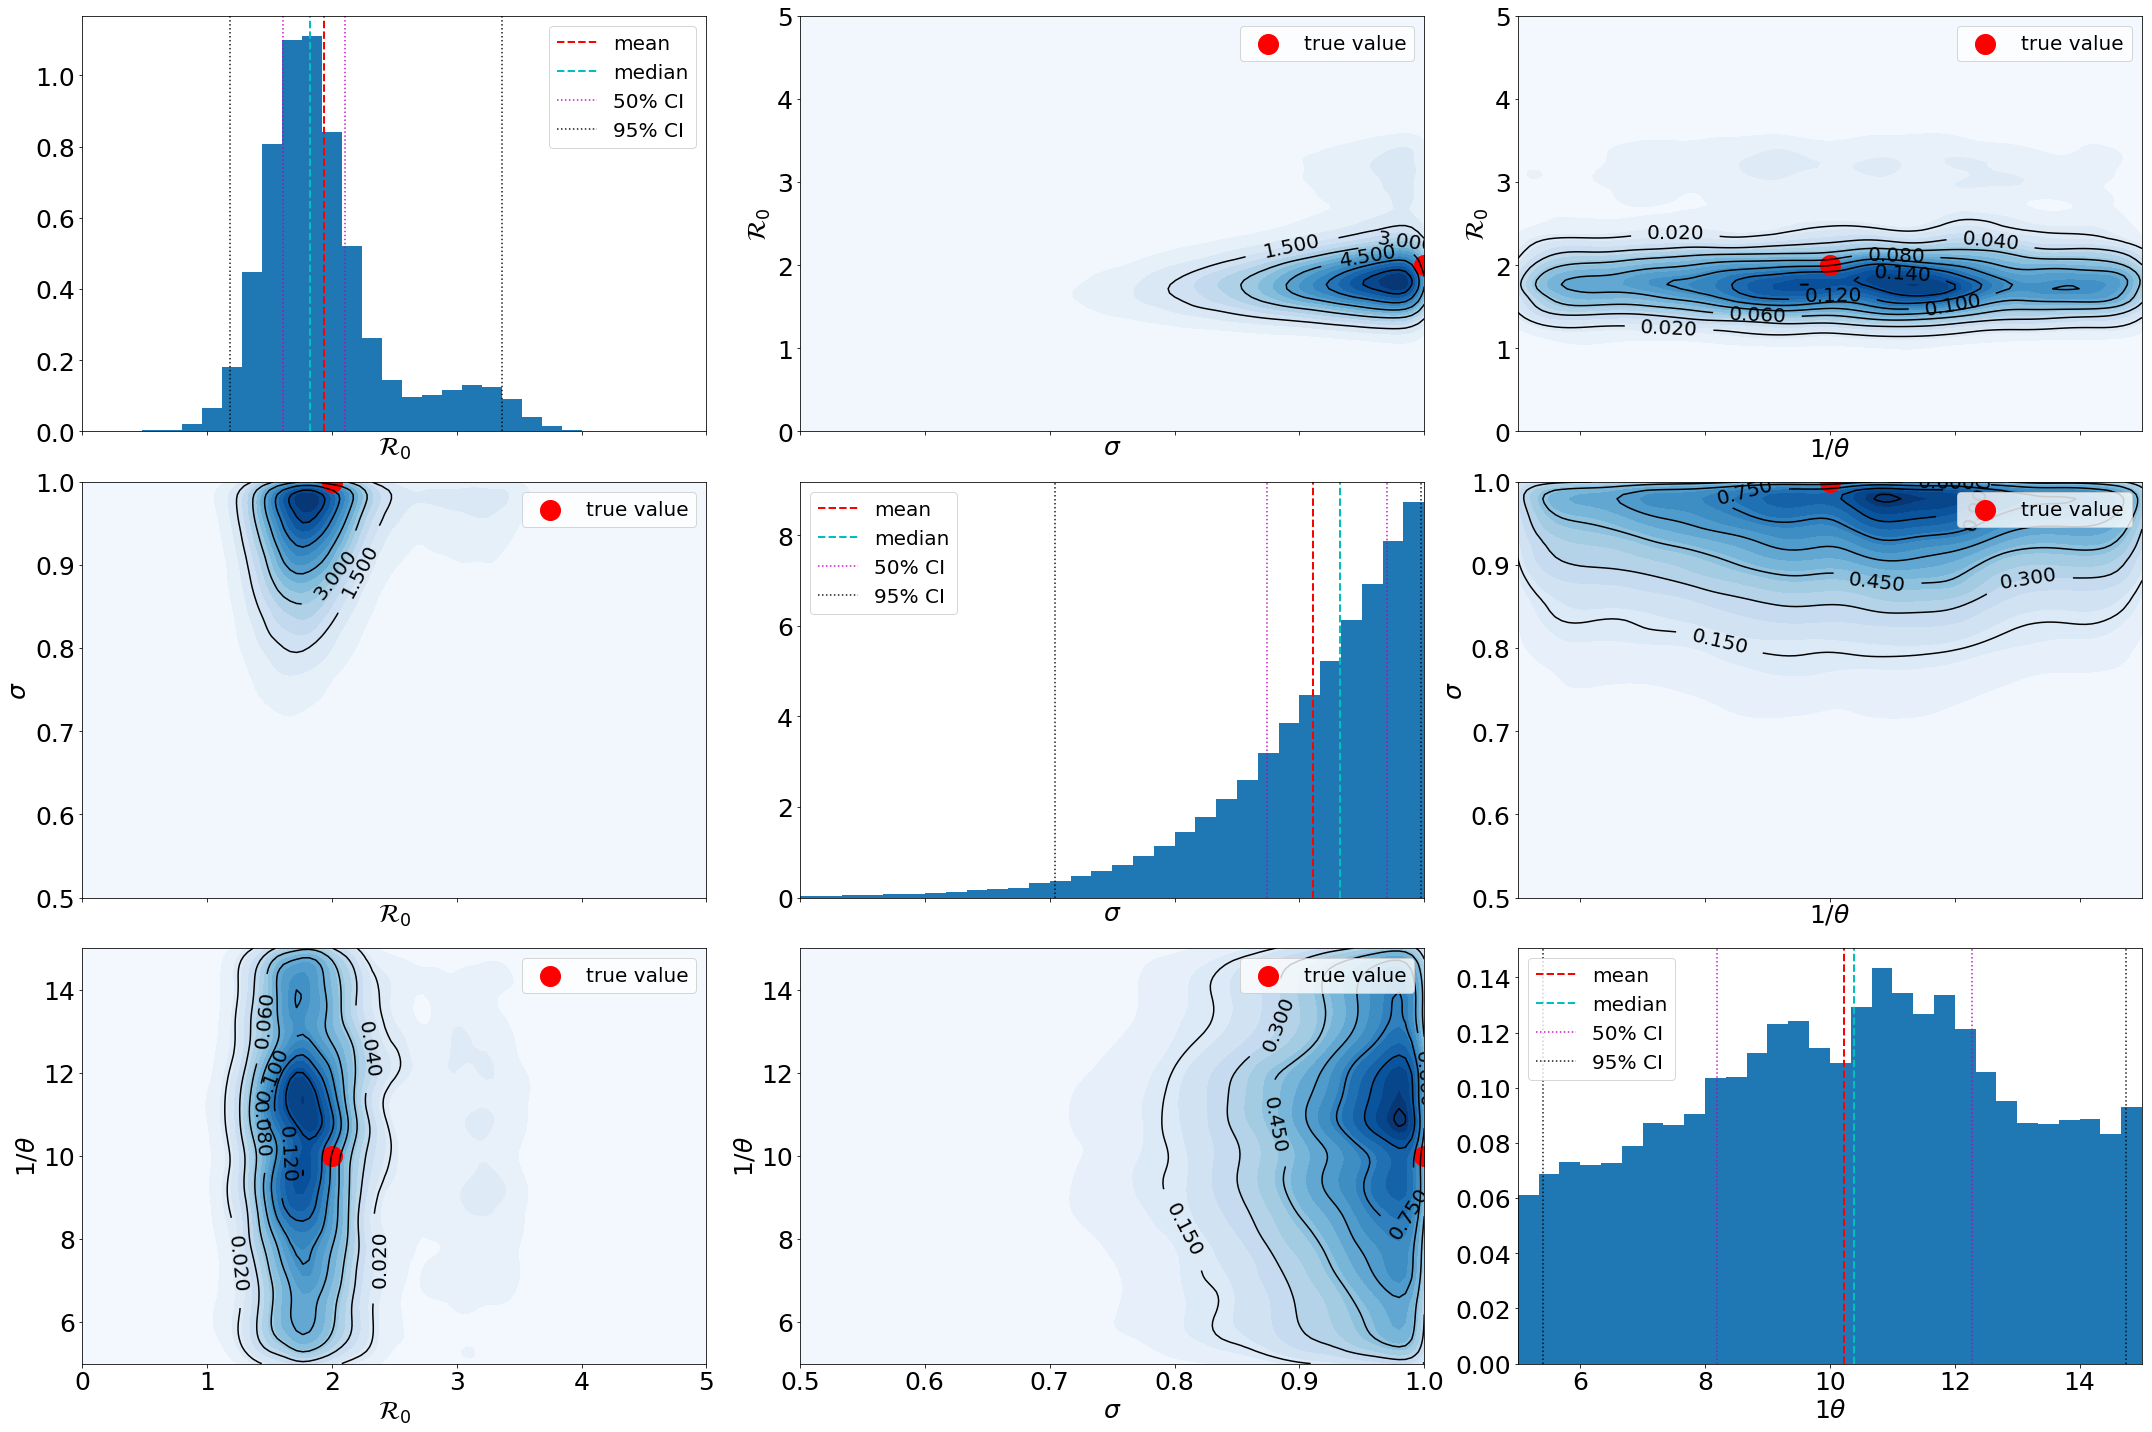

In [20]:
print('Marginal and joint-marginal posterior distributions, with statistics')
plot_3D_marginal_distributions(param1, param2, param3, 15, f12, f23, f13, file_name='figure_S6.eps',data_source=0)